딥러닝 라이브러리

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 딥러닝 구조와 레이어

## Input 객체

In [2]:
keras.Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_1')>

In [3]:
keras.Input(shape=(28, 28), dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

In [4]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16)

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input_3')>

In [5]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16, name='input')

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input')>

## Dense 레이어

In [6]:
layers.Dense(10)

In [7]:
layers.Dense(10, name='layer1')

In [8]:
layers.Dense(10, activation='softmax')

In [9]:
layers.Dense(10, activation='relu', name='Dense Layer')

In [10]:
inputs = tf.random.uniform(shape=(5, 2))
print(inputs)
print('--' * 16)
layer = layers.Dense(10, activation='relu')
outputs = layer(inputs)
print(layer.weights)
print('--' * 16)
print(layer.bias)
print('--' * 16)
print(outputs)

tf.Tensor(
[[0.63670635 0.17733133]
 [0.3788824  0.11376965]
 [0.83159876 0.56821156]
 [0.7868972  0.5446278 ]
 [0.4216143  0.9358351 ]], shape=(5, 2), dtype=float32)
--------------------------------
[<tf.Variable 'dense_2/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.4116903 , -0.36810163,  0.53382164,  0.36083025, -0.5928984 ,
        -0.01611006, -0.6703001 ,  0.49093086, -0.60399264,  0.28087014],
       [-0.16580957,  0.65194124, -0.4602026 , -0.6412479 ,  0.4022773 ,
        -0.5890695 , -0.12544233,  0.22305477, -0.51569366,  0.09605587]],
      dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]
--------------------------------
<tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
--------------------------------
tf.Tensor(
[[0.2327226  0.         0.2582793  0.11602957 0.         0.
  0.         0.352133

In [11]:
a = tf.constant([[0.59704745, 0.27920556]])
b = tf.constant([[0.11358964], [0.43607777]])

In [12]:
print(a @ b)

tf.Tensor([[0.18957375]], shape=(1, 1), dtype=float32)


## Activation 레이어

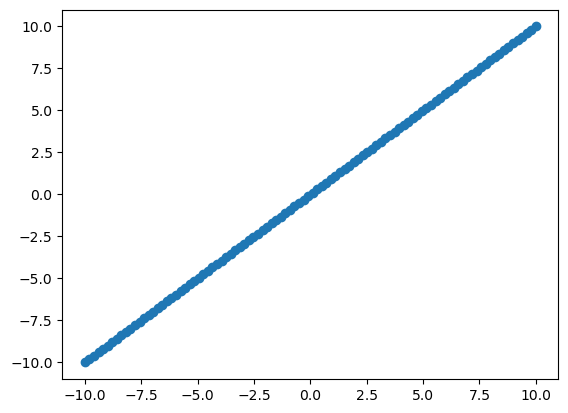

In [13]:
import numpy as np
import matplotlib.pyplot as plt

input = np.linspace(-10, 10, 100)
x = np.linspace(-10, 10, 100)
plt.scatter(x, input)
plt.show()

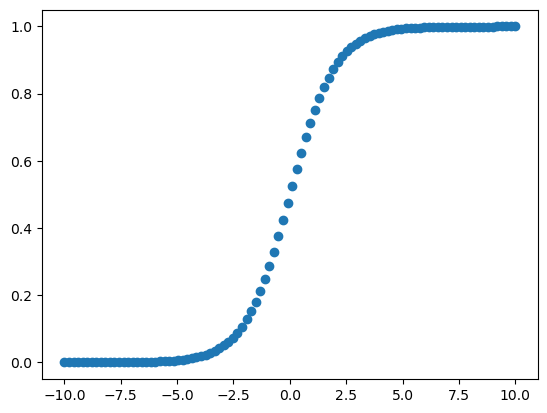

In [14]:
# 시그모이드
layer = layers.Activation('sigmoid')
output = layer(input)

plt.scatter(x, output)
plt.show()

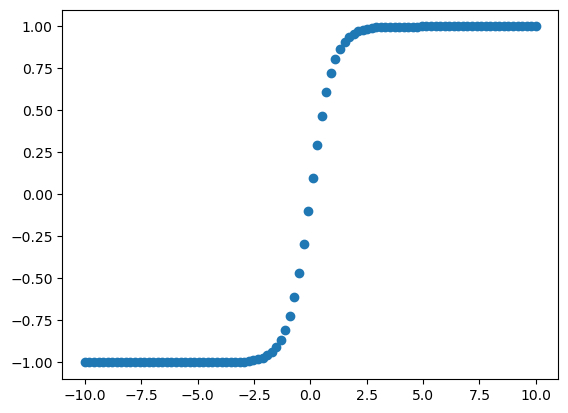

In [15]:
# 하이퍼볼릭 탄젠트 함수
layer = layers.Activation('tanh')
output = layer(input)

plt.scatter(x, output)
plt.show()

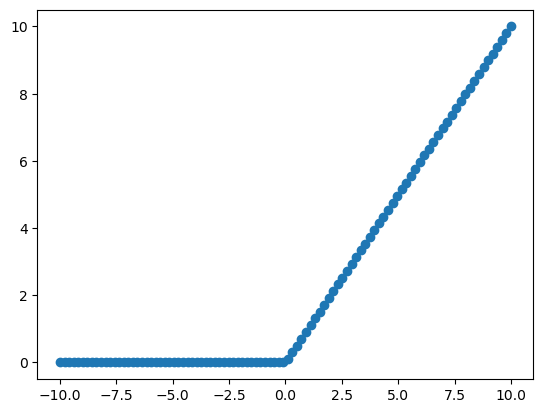

In [16]:
# ReLU
layer = layers.Activation('relu')
output = layer(input)

plt.scatter(x, output)
plt.show()

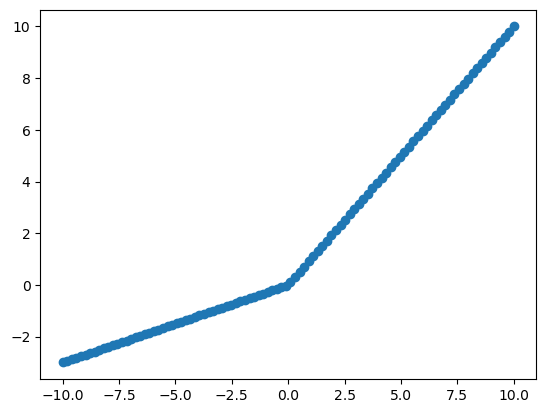

In [17]:
# Leaky ReLU 
layer = layers.LeakyReLU()
output = layer(input)

plt.scatter(x, output)
plt.show()

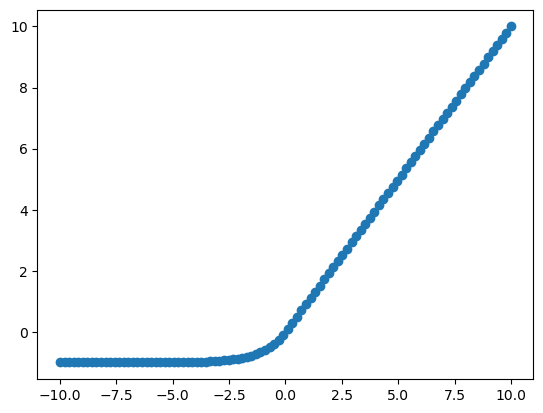

In [18]:
# ELU 
layer = layers.ELU()
output = layer(input)

plt.scatter(x, output)
plt.show()

## Flatten 레이어

In [19]:
inputs = keras.Input(shape=(28, 28, 1))
layer = layers.Flatten(input_shape=(28, 28, 1))(inputs)
print(layer.shape)

(None, 784)


In [20]:
inputs = keras.Input(shape=(28, 28, 3))
layer = layers.Flatten(input_shape=(28, 28, 3))(inputs)
print(layer.shape)

(None, 2352)


In [21]:
inputs = keras.Input(shape=(224, 224, 1))
layer = layers.Flatten(input_shape=(224, 224, 1))(inputs)
print(layer.shape)

(None, 50176)


# 딥러닝 모델

In [2]:
from tensorflow.keras import models, utils

## Sequential API

In [3]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 300)           8700      
                                                                 
 dense_1 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_2 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39810 (155.51 KB)
Trainable params: 39810 (155.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


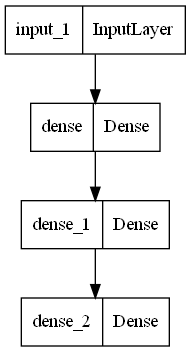

In [4]:
utils.plot_model(model)

In [5]:
model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 Output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39810 (155.51 KB)
Trainable params: 39810 (155.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


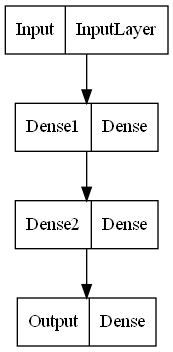

In [6]:
utils.plot_model(model)

## Functional API

In [7]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


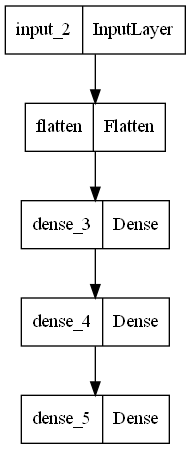

In [8]:
utils.plot_model(model)

In [9]:
inputs = keras.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 28, 100)              2900      ['input_3[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 28, 30)               3030      ['dense_6[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 28, 58)               0         ['input_3[0][0]',             
                                                                     'dense_7[0][0]']       

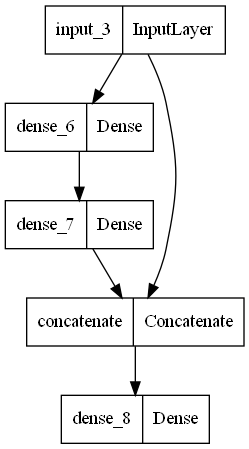

In [10]:
utils.plot_model(model)

In [11]:
input_1 = keras.Input(shape=(10, 10), name='Input_1')
input_2 = keras.Input(shape=(10, 28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input_2 (InputLayer)        [(None, 10, 28)]             0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 10, 100)              2900      ['Input_2[0][0]']             
                                                                                                  
 Input_1 (InputLayer)        [(None, 10, 10)]             0         []                            
                                                                                                  
 dense_10 (Dense)            (None, 10, 10)               1010      ['dense_9[0][0]']             
                                                                                            

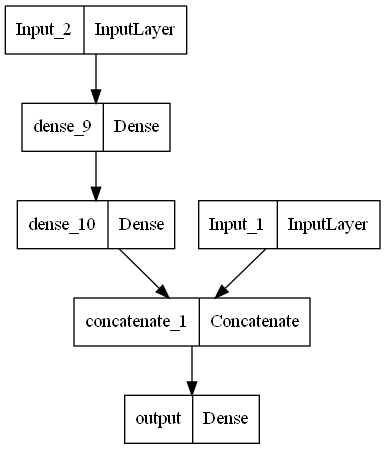

In [12]:
utils.plot_model(model)

In [13]:
input_ = keras.Input(shape=(10, 10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ (InputLayer)         [(None, 10, 10)]             0         []                            
                                                                                                  
 dense_11 (Dense)            (None, 10, 100)              1100      ['input_[0][0]']              
                                                                                                  
 dense_12 (Dense)            (None, 10, 10)               1010      ['dense_11[0][0]']            
                                                                                                  
 main_output (Dense)         (None, 10, 1)                11        ['dense_12[0][0]']            
                                                                                            

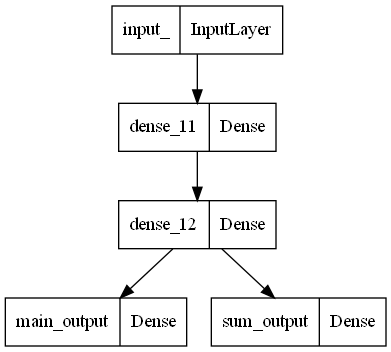

In [14]:
utils.plot_model(model)

In [15]:
input_1 = keras.Input(shape=(10, 10), name='input_1')
input_2 = keras.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 10, 28)]             0         []                            
                                                                                                  
 dense_13 (Dense)            (None, 10, 100)              2900      ['input_2[0][0]']             
                                                                                                  
 input_1 (InputLayer)        [(None, 10, 10)]             0         []                            
                                                                                                  
 dense_14 (Dense)            (None, 10, 10)               1010      ['dense_13[0][0]']            
                                                                                            

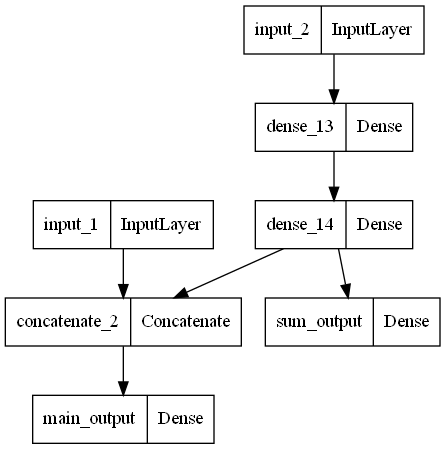

In [16]:
utils.plot_model(model)

## Subclassing API

In [17]:
# Subclassing API의 예시
class MyModel(models.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = layers.Dense(300, activation=activation)
    self.dense_layer2 = layers.Dense(100, activation=activation)
    self.dense_layer3 = layers.Dense(units, activation=activation)
    self.output_layer = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

# 실습

In [18]:
model = models.Sequential()

# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요.
model.add(layers.Input(shape=(100, 100, 3)))

# Flatten 레이어를 쌓으세요.
model.add(layers.Flatten())
# model.add(layers.Flatten(input_shape=(100, 100, 3)))
# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(400, activation='relu'))

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(200, activation='relu'))

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(100, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30000)             0         
                                                                 
 dense_15 (Dense)            (None, 400)               12000400  
                                                                 
 dense_16 (Dense)            (None, 200)               80200     
                                                                 
 dense_17 (Dense)            (None, 100)               20100     
                                                                 
Total params: 12100700 (46.16 MB)
Trainable params: 12100700 (46.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


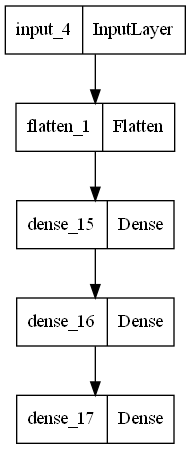

In [19]:
utils.plot_model(model)

In [31]:
# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요
inputs = layers.Input(shape=(100, 100, 3))

# Flatten 레이어를 쌓으세요.
x = layers.Flatten(input_shape=(100, 100, 3))(inputs)

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(400, activation='relu')(x)

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(200, activation='relu')(x)

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(100, activation='relu')(x)

model = models.Model(inputs = inputs, outputs = x)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 flatten_5 (Flatten)         (None, 30000)             0         
                                                                 
 dense_27 (Dense)            (None, 400)               12000400  
                                                                 
 dense_28 (Dense)            (None, 200)               80200     
                                                                 
 dense_29 (Dense)            (None, 100)               20100     
                                                                 
Total params: 12100700 (46.16 MB)
Trainable params: 12100700 (46.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


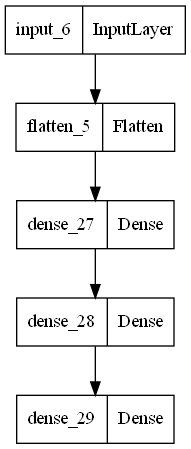

In [33]:
utils.plot_model(model)

In [24]:
class YourModel(models.Model):
  def __init__(self, **kwargs):
    super(YourModel, self).__init__(**kwargs)
    # Flatten 레이어를 쌓으세요.
    self.flat_layer = layers.Flatten()
    # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer1 = layers.Dense(400, activation='relu')
    # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer2 = layers.Dense(200, activation='relu')
    # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
    self.output_layer = layers.Dense(100, activation='softmax')

  def call(self, inputs):
    # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
    x = self.flat_layer(inputs)
    x = self.dense_layer1(x)
    x = self.dense_layer2(x)
    x = self.output_layer(x)
    return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(data, (-1, 100, 100, 3))
model = YourModel()
model(data)

model.summary()

Model: "your_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_24 (Dense)            multiple                  12000400  
                                                                 
 dense_25 (Dense)            multiple                  80200     
                                                                 
 dense_26 (Dense)            multiple                  20100     
                                                                 
Total params: 12100700 (46.16 MB)
Trainable params: 12100700 (46.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model

In [52]:
input_1 = layers.Input(shape=(40))
input_2 = layers.Input(shape=(10))
dense = layers.Dense(100, activation='relu')(input_1)
dense_1 = layers.Dense(100, activation='relu')(input_2)
concat = layers.Concatenate()([dense, dense_1])
dense_3 = layers.Dense(40, activation='relu')(concat)
dense_2 = layers.Dense(1, activation='relu')(concat)
dense_4 = layers.Dense(10, activation='relu')(dense_3)
model = models.Model(inputs=[input_1,input_2], outputs=[dense_2, dense_4])
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None, 40)]                 0         []                            
                                                                                                  
 input_25 (InputLayer)       [(None, 10)]                 0         []                            
                                                                                                  
 dense_70 (Dense)            (None, 100)                  4100      ['input_24[0][0]']            
                                                                                                  
 dense_71 (Dense)            (None, 100)                  1100      ['input_25[0][0]']            
                                                                                           

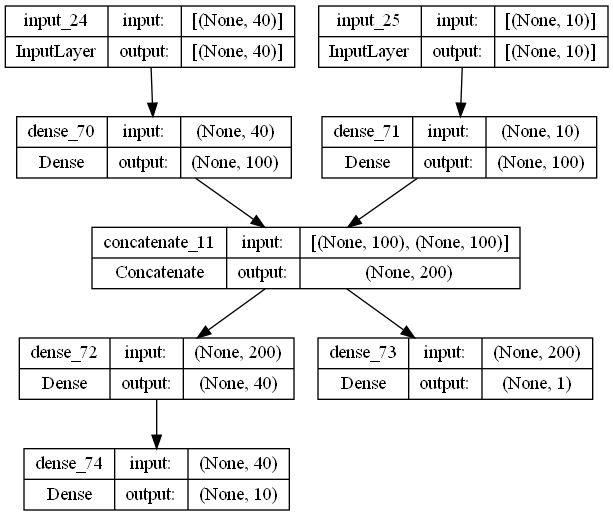

In [56]:
utils.plot_model(model, show_shapes=True, show_layer_names=True)

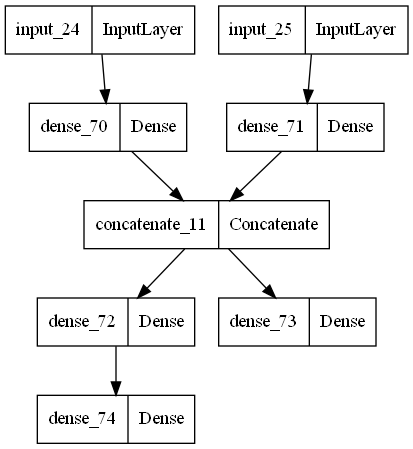

In [54]:
# # 각 레이어의 입력 및 출력 형태 출력
# for layer in model.layers:
#     print(f"Layer Name: {layer.name}")
#     print(f"Input Shape: {layer.input_shape}")
#     print(f"Output Shape: {layer.output_shape}")
#     print("="*30)

# 모델 아키텍처를 이미지로 저장
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(model, show_shapes=True, show_layer_names=True)